# Interactive Python Notebook of Hodgekin-Huxley Model

In [1]:
#%pip install ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use('ggplot')
from scipy.integrate import odeint

my_layout = widgets.Layout()

In [2]:
def hodgkinHuxley(yy,t):

	#Name the variables
	V = yy[0]
	n = yy[1]
	m = yy[2]
	h = yy[3]
	
	#Name the parameters
	C_m = 1.0
	V_K = -12.0
	V_Na = 115.0
	V_l = 10.613
	g_K = 36.0
	g_Na = 120.0
	g_l = 0.3
	#The injected current? ? ? ? 
	# HH model
	GK = (g_K/C_m)*np.power(n, 4.0)
	GNa = (g_Na/C_m)*np.power(m, 3.0)*h
	GL = (g_l/C_m)
	V_dot = (I/C_m) - (GK*(V-V_K)) - (GNa*(V-V_Na)) - (GL*(V-V_l))
	n_dot = alpha_n(V) * (1-n) - beta_n(V) *n
	m_dot = alpha_m(V) * (1-m) - beta_m(V) *m
	h_dot = alpha_h(V) * (1-h) - beta_h(V) *h
	
	return [V_dot, n_dot, m_dot, h_dot]

In [3]:
#Auxiliary quantities	
def alpha_n(V):
    return (0.01*(10-V)) / (np.exp((10-V)/10) -1) 

def beta_n(V):
    return 0.125 * np.exp(-V/80)	

def alpha_m(V):
    return (0.1 *(25-V)) / (np.exp((25-V)/10) -1)

def beta_m(V):
    return 4 * np.exp(-V/18)

def alpha_h(V):
    return 0.07 * np.exp(-V/20)

def beta_h(V):
    return 1 / (np.exp((30-V)/10) +1) 

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

y0 = np.array([0.0, n_inf(), m_inf(), h_inf()])

#Define time interval and spacing for the solutions
t = np.arange(0,100,0.01)


In [4]:
# @widgets.interact(
#     I=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),
#     V_Na=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),
#     V_K=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),
#     V_l=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),
#     g_Na=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),
#     g_K=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),
#     g_l=widgets.FloatSlider(50., min=-20., max=150., step=1.,
#                                layout=my_layout),

# )
# def HH_plot(V_Na, V_K, V_l, g_Na, g_K, g_l, I):
#     plt.figure(figsize=(10, 5))
#     plt.ylabel("Volts (mV)")
#     plt.xlabel("Time (msec)")
#     plt.suptitle("HH-model Dynamics")
#     #Pack the parameters in a single vector
#     p = [C_m,V_Na,V_K,V_l,g_Na,g_K,g_l,I] 
#     #Call the integrator 
#     y = odeint(hodgkinHuxley, y0, t, args=(p,))
#     plt.plot(t,y[:,0])


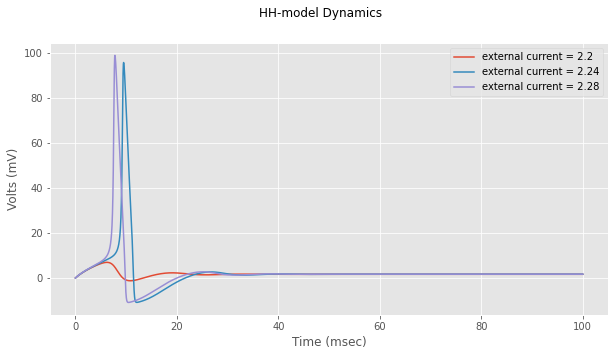

In [16]:
plt.figure(figsize=(10, 5))
plt.ylabel("Volts (mV)")
plt.xlabel("Time (msec)")
plt.suptitle("HH-model Dynamics")
#Pack the parameters in a single vector
#Call the integrator 

for I in np.around(np.arange(2.2, 2.3, 0.04), 3):
    y = odeint(hodgkinHuxley, y0, t)
    plt.plot(t,y[:,0], label = f"external current = {I}")
    plt.legend()